# Loading data

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv("Mall_Customers.csv")

### EDA

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
 6   DBSCAN_Cluster          200 non-null    int64 
dtypes: int32(1), int64(5), object(1)
memory usage: 10.3+ KB


In [57]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,DBSCAN_Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.400000,0.135000
std,57.879185,13.969007,26.264721,25.823522,1.449311,0.444706
min,1.000000,18.000000,15.000000,1.000000,0.000000,-1.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000,0.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000,1.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

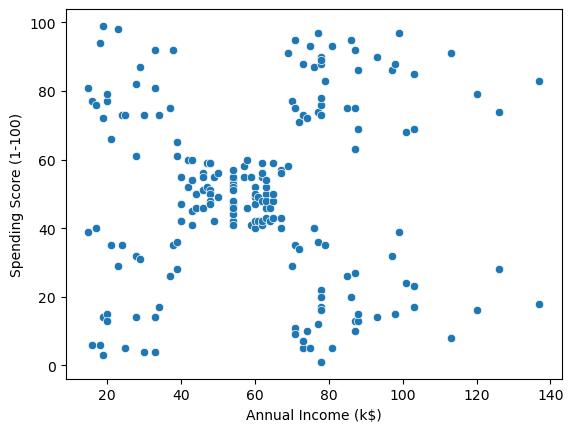

In [40]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)

# Clustering

In [48]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

### Perform scaling

In [42]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Finding the optimal number of clusters (Elbow method)

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\sajad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sajad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sajad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sajad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

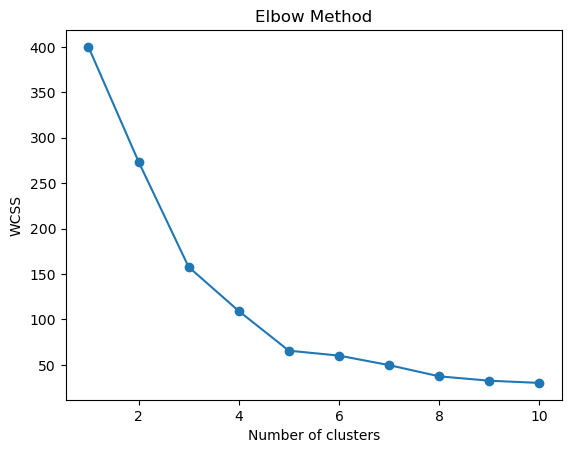

In [44]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

The optimal number of clusters is 5.

### Running K-Means and Labeling Clusters

In [45]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

C:\Users\sajad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Cluster visualization

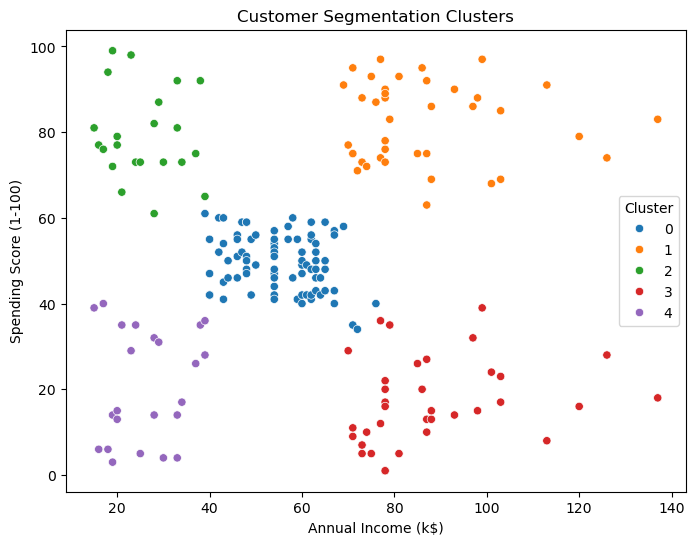

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='tab10')
plt.title('Customer Segmentation Clusters')
plt.show()

### Try DBSCAN

In [50]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

### Visualization of DBSCAN clustering

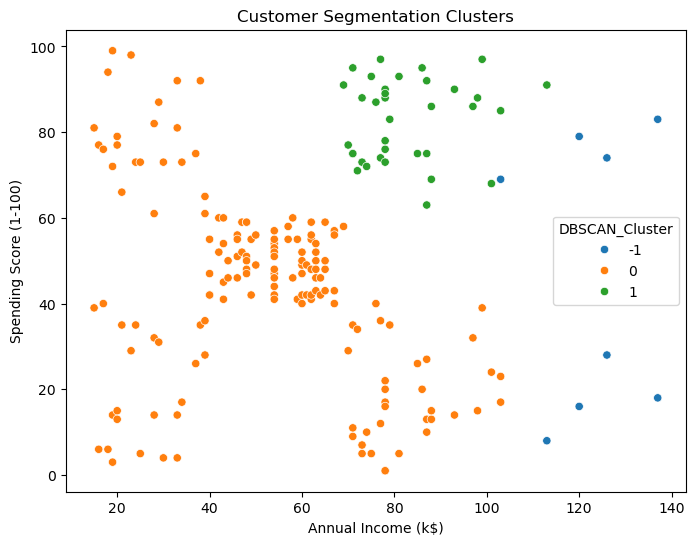

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=data, palette='tab10')
plt.title('Customer Segmentation Clusters')
plt.show()

# Analyze average spending per cluster

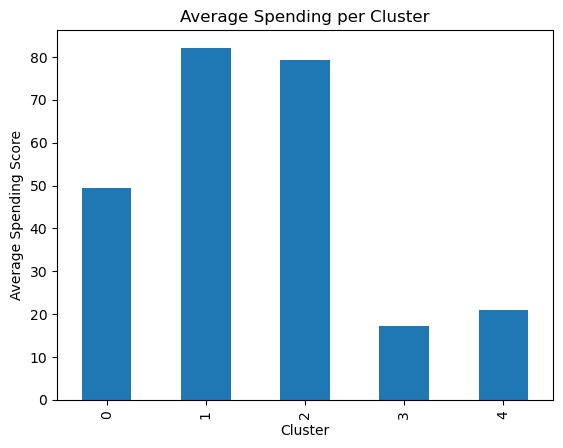

In [53]:
avg_spending = data.groupby('Cluster')['Spending Score (1-100)'].mean()
avg_spending.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score')
plt.title('Average Spending per Cluster')
plt.show()

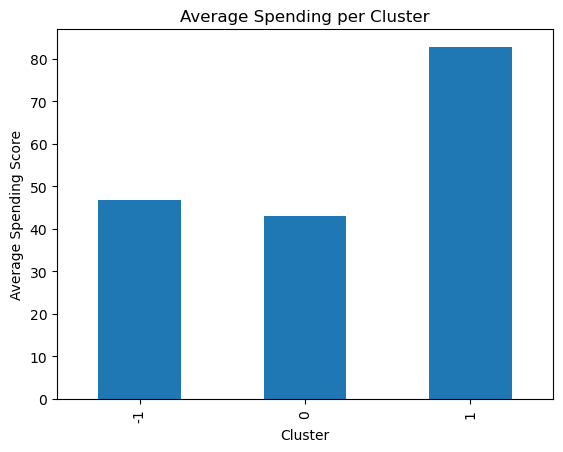

In [54]:
avg_spending = data.groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean()
avg_spending.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score')
plt.title('Average Spending per Cluster')
plt.show()